<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/10_Dimensionality_Reduction_in_Python/01_Exploring_High_Dimensional_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4. Clustering in Real World

In [69]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/08_Extreme_Gradient_Boosting_with_XGBoost/dataset/ames_unprocessed_data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ames_housing_trimmed_processed = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(ames_housing_trimmed_processed.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/fifa_18_sample_data.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
fifa = pd.read_csv(url)
display(fifa.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,NaN,65.0,8450,NaN,NaN,NaN,7,5,2003,...,1710,1,0,2,1,3,0,548,NaN,208500
1,20,NaN,80.0,9600,NaN,NaN,NaN,6,8,1976,...,1262,0,1,2,0,3,1,460,NaN,181500
2,60,NaN,68.0,11250,NaN,NaN,NaN,7,5,2001,...,1786,1,0,2,1,3,1,608,NaN,223500
3,70,NaN,60.0,9550,NaN,NaN,NaN,7,5,1915,...,1717,1,0,1,0,3,1,642,NaN,140000
4,60,NaN,84.0,14260,NaN,NaN,NaN,8,5,2000,...,2198,1,0,2,1,4,1,836,NaN,250000


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


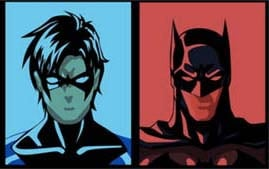

**Extract RGB values from image**   
There are broadly three steps to find the dominant colors in an image:

Extract RGB values into three lists.
Perform k-means clustering on scaled RGB values.
Display the colors of cluster centers.
To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b have been initialized.

For the purpose of finding dominant colors, we will be using the following image.

In [70]:
# Import image class of matplotlib
import matplotlib.image as img
import urllib.request
from PIL import Image

# Read batman image and print dimensions
url = 'https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/batman.jpg'
with urllib.request.urlopen(url) as url_response:
    batman_image = np.array(Image.open(url_response))

print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
r = []
g = []
b = []
for pixels in batman_image:
    for temp_r, temp_g, temp_b in pixels:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

# You have successfully extracted the RGB values of the image into three lists, one for each color channel.

(169, 269, 3)


**How many dominant colors?**  
We have loaded the following image using the imread() function of the image class of matplotlib.



The RGB values are stored in a DataFrame, batman_df. The RGB values have been standardized used the whiten() function, stored in columns, scaled_red, scaled_blue and scaled_green.

Construct an elbow plot with the DataFrame. How many dominant colors are present?

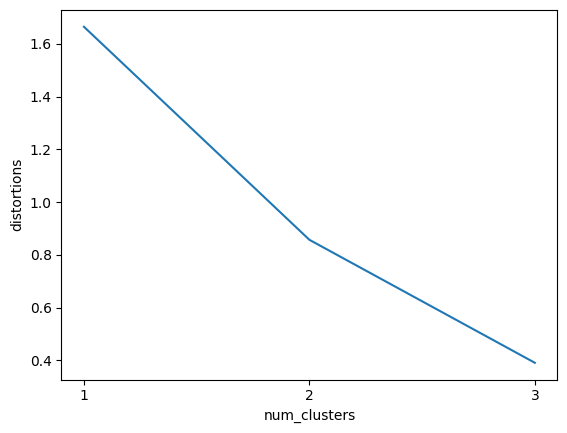

In [71]:
from scipy.cluster.vq import kmeans, whiten

# Create a DataFrame with RGB values
batman_df = pd.DataFrame({'red': r, 'green': g, 'blue': b})

# Standardize the RGB values
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_green'] = whiten(batman_df['green'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])


distortions = []
num_clusters = range(1, 4)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# that there are three distinct colors present in the image, which is supported by the elbow plot.

**Display dominant colors**
We have loaded the following image using the imread() function of the image class of matplotlib.



To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula:

    converted_pixel = standardized_pixel * pixel_std / 255

The RGB values are stored in a DataFrame, batman_df. The scaled RGB values are stored in columns, scaled_red, scaled_blue and scaled_green. The cluster centers are stored in the variable cluster_centers, which were generated using the kmeans() function with three clusters.

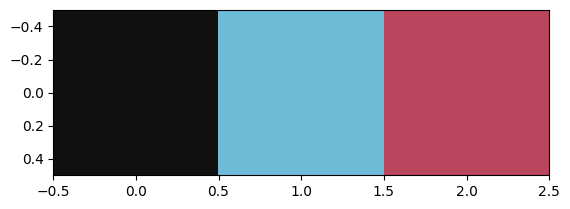

In [72]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = [] # Initialize the 'colors' list

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

### Document Clustering

**TF-IDF of movie plots**  
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.

Note: It takes a few seconds to run the .fit_transform() method.

In [73]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources (only once needed)
nltk.download('punkt')
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Define the custom tokenizer function
def remove_noise(text, stop_words=stop_words):
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for token in tokens:
        token = re.sub(r'[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())

    return cleaned_tokens

# Read movie plots dataset from GitHub
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/movies_plot.csv"
plots = pd.read_csv(url)

# Display first few rows
print(plots.head())

# Initialize TfidfVectorizer with the custom tokenizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.75,
    max_features=50,
    min_df=0.1,
    tokenizer=remove_noise
)

# Fit and transform the plot column to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(plots['Plot'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                       Title  \
0  The Ballad of Cable Hogue   
1        Monsters vs. Aliens   
2           The Bandit Queen   
3               Broken Arrow   
4                   Dolemite   

                                                Plot  
0  Cable Hogue is isolated in the desert, awaitin...  
1  In the far reaches of space, a planet explodes...  
2  Zarra Montalvo is the daughter of an American ...  
3  Major Vic Deakins (John Travolta) and Captain ...  
4  Dolemite is a pimp and nightclub owner who is ...  


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   also   another  away      back       car       day     death   decides  \
0   0.0  0.099038   0.0  0.078525  0.222384  0.096604  0.213866  0.302231   
1   0.0  0.000000   0.0  0.239035  0.000000  0.000000  0.000000  0.000000   
2   0.0  0.000000   0.0  0.183650  0.000000  0.000000  0.000000  0.000000   
3   0.0  0.000000   0.0  0.000000  0.000000  0.000000  0.222655  0.209768   
4   0.0  0.000000   0.0  0.000000  0.000000  0.408386  0.000000  0.000000   

     family    father  ...   returns      take     takes  tells      time  \
0  0.000000  0.000000  ...  0.000000  0.000000  0.090062  0.178  0.174410   
1  0.154675  0.000000  ...  0.155219  0.404597  0.000000  0.000  0.132729   
2  0.475345  0.663775  ...  0.000000  0.000000  0.000000  0.000  0.000000   
3  0.000000  0.000000  ...  0.000000  0.184501  0.000000  0.000  0.000000   
4  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000  0.000000   

     town     tries       two       way  wife  
0  0.5874  0.000000  0.319

**Top terms in movie clusters**  
Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in Python joins two lists.

The tfidf_vectorizer object and sparse matrix, tfidf_matrix, from the previous have been retained in this exercise. kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.

In [75]:
num_clusters = 2  # Define num_clusters before using it

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

# Notice positive, warm words in the first cluster and words referring to action in the second cluster.

['film', 'life', 'wife']
['back', 'one', 'two']


### Clustering with many features
What should you do if you have too many features for clustering?

->
Reduce features using a technique like Factor Analysis [ You should explore steps to reduce the number of features ]

**Basic checks on clusters**  
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a pandas DataFrame, fifa. The scaled column names are present in a list scaled_features. The cluster labels are stored in the cluster_labels column. Recall the .count() and .mean() methods in pandas help you find the number of observations and mean of observations in a DataFrame.

cluster_labels
1    554
2    139
3    307
Name: ID, dtype: int64
cluster_labels
1    70503.610108
2    51410.071942
3    75657.980456
Name: eur_wage, dtype: float64


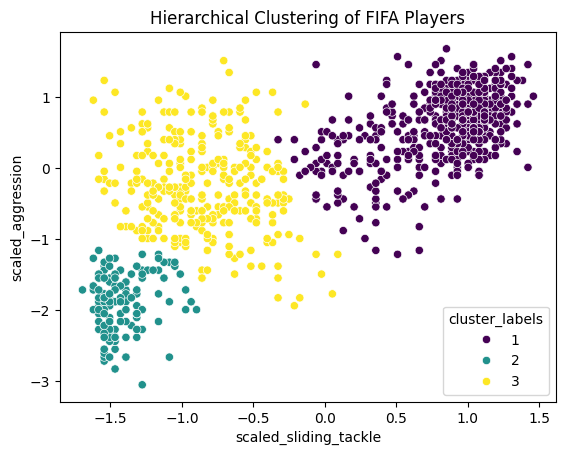

In [87]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from IPython.display import display


# Load dataset
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/09_Cluster_Analysis_in_Python/dataset/fifa_18_sample_data.csv"
fifa = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing required values
fifa = fifa.dropna(subset=['sliding_tackle', 'aggression'])

# Scale the relevant columns
scaler = StandardScaler()
fifa[['scaled_sliding_tackle', 'scaled_aggression']] = scaler.fit_transform(
    fifa[['sliding_tackle', 'aggression']]
)


# Hierarchical clustering
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Print cluster info
print(fifa.groupby('cluster_labels')['ID'].count())
print(fifa.groupby('cluster_labels')['eur_wage'].mean())


import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x='scaled_sliding_tackle',
    y='scaled_aggression',
    hue='cluster_labels',
    data=fifa,
    palette='viridis'
)
plt.title("Hierarchical Clustering of FIFA Players")
plt.show()


In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant features
features = ['pac', 'dri', 'sho']
fifa_features = fifa[features]

# Scale the features
scaler = StandardScaler()
fifa_scaled = scaler.fit_transform(fifa_features)

# Perform k-means clustering
# Let's choose an arbitrary number of clusters, say 3, for demonstration
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
fifa['cluster_labels'] = kmeans.fit_predict(fifa_scaled)

F**IFA 18: what makes a complete player?**  
The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

Here is a sample card:
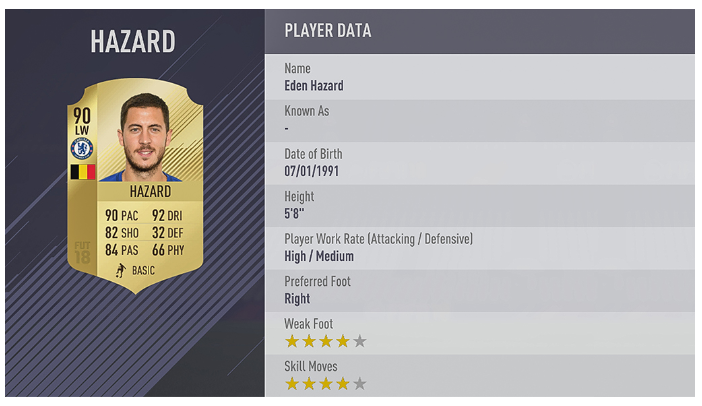
Eden Hazard Player Card

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a pandas DataFrame, fifa. features is the list of these column names and scaled_features is the list of columns which contains their scaled values. The following have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns.

Before you start the exercise, you may wish to explore scaled_features to check out the list of six scaled columns names.

In [ ]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])          # compare wher error is the mistakes

                      pac        dri        sho        pas        def  \
cluster_labels                                                          
0               77.862534  80.117251  73.801887  74.370620  51.289757   
1               61.445736  62.957364  49.500000  62.887597  78.713178   

                      phy  
cluster_labels             
0               71.644205  
1               77.856589  


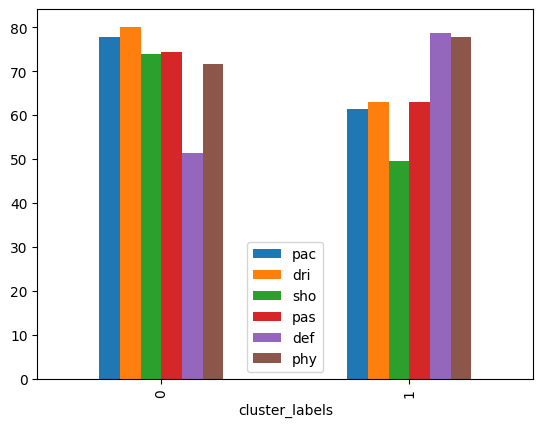

0 [nan nan nan nan nan]
1 [nan nan nan nan nan]


In [95]:
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa_scaled, 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa_scaled, cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])


In [89]:
# Define the list of scaled features
scaled_features = ['pac', 'dri', 'sho', 'pas', 'def', 'phy']